# Model Evaluation & Validation

### Project: Predicting Housing Price: Data Visualization

In [8]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import pickle
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load housing dataset
data = pd.read_csv('DataSet_pricing_model.csv')

# Success
print ("Housing dataset has {} data points with {} variables each.".format(*data.shape))

Housing dataset has 25000 data points with 26 variables each.


In [9]:
# Feature of datatype
data.columns


Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent', 'deposit'],
      dtype='object')

In [10]:
# view datatypes of each column
data.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom             int64
facing              object
cup_board          float64
floor                int64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent                 int64
deposit            float64
dtype: object

In [15]:
features_corelated = ['longitude', 'latitude', 'gym', 'lift', 'swimming_pool', 'property_size', 'bathroom', 'floor', 'total_floor', 'balconies', 'building_type', 'parking', 'type']

In [11]:
# set target
y = data.rent

In [17]:
encoded_features = pd.get_dummies(data[features_corelated])

In [18]:
encoded_features.describe()

,longitude,latitude,gym,lift,swimming_pool,property_size,bathroom,floor,total_floor,balconies,...,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1
count,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,77.637447,12.945900,0.22608,0.362440,0.174600,1063.764160,1.861120,1.881600,3.810480,1.15212,...,0.528680,0.069400,0.051160,0.350760,0.176360,0.568120,0.215720,0.011960,0.001520,0.026320
std,0.111732,0.029613,0.41830,0.480715,0.379632,591.174731,0.759589,2.187879,3.201751,1.00891,...,0.499187,0.254138,0.220328,0.477217,0.381134,0.495348,0.411329,0.108708,0.038958,0.160088
min,77.500072,12.900004,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.571956,12.918511,0.00000,0.000000,0.000000,700.000000,1.000000,1.000000,2.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.633363,12.943927,0.00000,0.000000,0.000000,1050.000000,2.000000,1.000000,3.000000,1.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,77.695972,12.971114,0.00000,1.000000,0.000000,1290.000000,2.000000,3.000000,4.000000,2.00000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,80.266346,12.999999,1.00000,1.000000,1.000000,50000.000000,34.000000,25.000000,50.000000,22.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### To see corelation between features and target value,We have plotted here a corelation matrix.

#### Then we decided to keep features which are corelated to target value

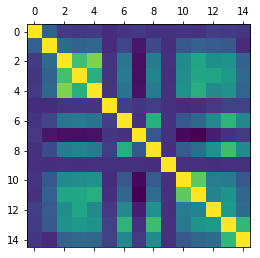

In [13]:
# Find Corelation
import matplotlib.pyplot as plt

plt.matshow(data.corr())

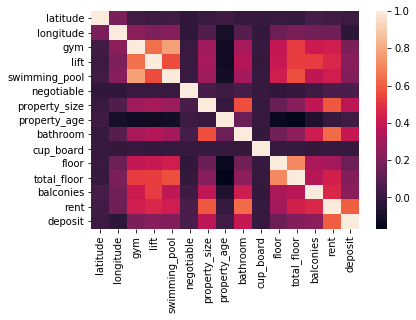

In [14]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [21]:
# Split into validation and training data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(encoded_features, y, test_size=0.2)